# Loading Packages

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(tidyr)
library(psych)
library(plotly)
library(lime)
library(GGally)
library(performance) 
library(MLmetrics)
library(lmtest)
library(car)
library(caret)
library(randomForest)
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: timechange


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'lime'


The following object is masked from 'package:dplyr':

    explain


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'MLmetrics'


The following object is masked from 'package:psych':

    AUC


The following

# Reading Data

In [2]:
data <- read.csv('energydata_complete.csv')

In [3]:
head(data)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,⋯,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2,2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,⋯,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619
3,2016-01-11 17:20:00,50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,⋯,17.00000,45.50,6.366667,733.7,92,6.333333,55.33333,5.1,28.64267,28.64267
4,2016-01-11 17:30:00,50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.250000,733.8,92,6.000000,51.50000,5.0,45.41039,45.41039
5,2016-01-11 17:40:00,60,40,19.89,46.33333,19.2,44.53000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.133333,733.9,92,5.666667,47.66667,4.9,10.08410,10.08410
6,2016-01-11 17:50:00,50,40,19.89,46.02667,19.2,44.50000,19.79,44.93333,18.89000,⋯,17.00000,45.29,6.016667,734.0,92,5.333333,43.83333,4.8,44.91948,44.91948


# Data Pre- Processing:

Checking the missing values in dataset

In [4]:
colSums(is.na(data))

date  Appliances      lights          T1        RH_1          T2 
          0           0           0           0           0           0 
       RH_2          T3        RH_3          T4        RH_4          T5 
          0           0           0           0           0           0 
       RH_5          T6        RH_6          T7        RH_7          T8 
          0           0           0           0           0           0 
       RH_8          T9        RH_9       T_out Press_mm_hg      RH_out 
          0           0           0           0           0           0 
  Windspeed  Visibility   Tdewpoint         rv1         rv2 
          0           0           0           0           0

Checking and removing the duplicate rows

In [5]:
unique(data) # there were no duplicate rows

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89000,47.59667,19.20000,44.79000,19.79000,44.73000,19.00000,⋯,17.03333,45.53000,6.600000,733.5000,92.00000,7.000000,63.00000,5.300000,13.2754332,13.2754332
2,2016-01-11 17:10:00,60,30,19.89000,46.69333,19.20000,44.72250,19.79000,44.79000,19.00000,⋯,17.06667,45.56000,6.483333,733.6000,92.00000,6.666667,59.16667,5.200000,18.6061950,18.6061950
3,2016-01-11 17:20:00,50,30,19.89000,46.30000,19.20000,44.62667,19.79000,44.93333,18.92667,⋯,17.00000,45.50000,6.366667,733.7000,92.00000,6.333333,55.33333,5.100000,28.6426682,28.6426682
4,2016-01-11 17:30:00,50,40,19.89000,46.06667,19.20000,44.59000,19.79000,45.00000,18.89000,⋯,17.00000,45.40000,6.250000,733.8000,92.00000,6.000000,51.50000,5.000000,45.4103895,45.4103895
5,2016-01-11 17:40:00,60,40,19.89000,46.33333,19.20000,44.53000,19.79000,45.00000,18.89000,⋯,17.00000,45.40000,6.133333,733.9000,92.00000,5.666667,47.66667,4.900000,10.0840966,10.0840966
6,2016-01-11 17:50:00,50,40,19.89000,46.02667,19.20000,44.50000,19.79000,44.93333,18.89000,⋯,17.00000,45.29000,6.016667,734.0000,92.00000,5.333333,43.83333,4.800000,44.9194842,44.9194842
7,2016-01-11 18:00:00,60,50,19.89000,45.76667,19.20000,44.50000,19.79000,44.90000,18.89000,⋯,17.00000,45.29000,5.900000,734.1000,92.00000,5.000000,40.00000,4.700000,47.2337634,47.2337634
8,2016-01-11 18:10:00,60,50,19.85667,45.56000,19.20000,44.50000,19.73000,44.90000,18.89000,⋯,17.00000,45.29000,5.916667,734.1667,91.83333,5.166667,40.00000,4.683333,33.0398896,33.0398896
9,2016-01-11 18:20:00,60,40,19.79000,45.59750,19.20000,44.43333,19.73000,44.79000,18.89000,⋯,17.00000,45.29000,5.933333,734.2333,91.66667,5.333333,40.00000,4.666667,31.4557022,31.4557022


Removing the rows that contains NA values

In [6]:
data <- data %>% filter(complete.cases(.)) # No rows with NA values were present

In [7]:
data

date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-11 17:00:00,60,30,19.89000,47.59667,19.20000,44.79000,19.79000,44.73000,19.00000,⋯,17.03333,45.53000,6.600000,733.5000,92.00000,7.000000,63.00000,5.300000,13.2754332,13.2754332
2016-01-11 17:10:00,60,30,19.89000,46.69333,19.20000,44.72250,19.79000,44.79000,19.00000,⋯,17.06667,45.56000,6.483333,733.6000,92.00000,6.666667,59.16667,5.200000,18.6061950,18.6061950
2016-01-11 17:20:00,50,30,19.89000,46.30000,19.20000,44.62667,19.79000,44.93333,18.92667,⋯,17.00000,45.50000,6.366667,733.7000,92.00000,6.333333,55.33333,5.100000,28.6426682,28.6426682
2016-01-11 17:30:00,50,40,19.89000,46.06667,19.20000,44.59000,19.79000,45.00000,18.89000,⋯,17.00000,45.40000,6.250000,733.8000,92.00000,6.000000,51.50000,5.000000,45.4103895,45.4103895
2016-01-11 17:40:00,60,40,19.89000,46.33333,19.20000,44.53000,19.79000,45.00000,18.89000,⋯,17.00000,45.40000,6.133333,733.9000,92.00000,5.666667,47.66667,4.900000,10.0840966,10.0840966
2016-01-11 17:50:00,50,40,19.89000,46.02667,19.20000,44.50000,19.79000,44.93333,18.89000,⋯,17.00000,45.29000,6.016667,734.0000,92.00000,5.333333,43.83333,4.800000,44.9194842,44.9194842
2016-01-11 18:00:00,60,50,19.89000,45.76667,19.20000,44.50000,19.79000,44.90000,18.89000,⋯,17.00000,45.29000,5.900000,734.1000,92.00000,5.000000,40.00000,4.700000,47.2337634,47.2337634
2016-01-11 18:10:00,60,50,19.85667,45.56000,19.20000,44.50000,19.73000,44.90000,18.89000,⋯,17.00000,45.29000,5.916667,734.1667,91.83333,5.166667,40.00000,4.683333,33.0398896,33.0398896
2016-01-11 18:20:00,60,40,19.79000,45.59750,19.20000,44.43333,19.73000,44.79000,18.89000,⋯,17.00000,45.29000,5.933333,734.2333,91.66667,5.333333,40.00000,4.666667,31.4557022,31.4557022


Renaming the columns names to increase the readability of data

In [8]:
data <- data %>% rename('temp_kitchen' = 'T1', 
                        'temp_living_room' = 'T2', 
                        'temp_laundry_room' = 'T3',
                        'temp_office_room' = 'T4',
                        'temp_bathroom' = 'T5', 
                        'temp_outside_building' = 'T6',
                        'temp_iron_room' ='T7', 
                        'temp_teens_room' = 'T8', 
                        'temp_parents_room' = 'T9', 
                        'temp_weather_station' = 'T_out',
                        'humid_kitchen' = 'RH_1', 
                        'humid_living_room' = 'RH_2', 
                        'humid_laundry_room' = 'RH_3', 
                        'humid_office_room'= 'RH_4', 
                        'humid_bathroom' = 'RH_5', 
                        'humid_outside_building' = 'RH_6',
                        'humid_iron_room' = 'RH_7', 
                        'humid_teens_room' = 'RH_8', 
                        'humid_parents_room' = 'RH_9', 
                        'humid_weather_station' = 'RH_out',
                        'random_variable_1' = 'rv1',
                        'random_variable_2' = 'rv2')

Changing the date from character data type to date time data type

In [9]:
data <- data %>% mutate(date = ymd_hms(date))
# summarise the data to 24h format
data <- data %>%
  mutate(date = floor_date(date, "hour")) %>%
  group_by(date) %>%
  select_if(is.numeric) %>%
  summarise_all("mean") %>%
  ungroup() %>%
  mutate(Day_of_week = wday(date, label = T),
        WeekStatus = ifelse(Day_of_week %in% c("Sat", "Sun"), "weekend", "weekday") , 
        WeekStatus = as.factor(WeekStatus),
        Day_of_week = as.factor(Day_of_week))

In [10]:
second_day <- function(x) {
  s <- hour(x)*3600+minute(x)*60+second(x)
  }

In [11]:
data$NSM <- second_day(data$date)

In [12]:
head(data)

date,Appliances,lights,temp_kitchen,humid_kitchen,temp_living_room,humid_living_room,temp_laundry_room,humid_laundry_room,temp_office_room,⋯,Press_mm_hg,humid_weather_station,Windspeed,Visibility,Tdewpoint,random_variable_1,random_variable_2,Day_of_week,WeekStatus,NSM
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<fct>,<dbl>
2016-01-11 17:00:00,55.0000,35.00000,19.89000,46.50278,19.20000,44.62653,19.79000,44.89778,18.93278,⋯,733.7500,92.00000,6.166667,53.41667,5.050000,26.82304,26.82304,Mon,weekday,61200
2016-01-11 18:00:00,176.6667,51.66667,19.89778,45.87903,19.26889,44.43889,19.77000,44.86333,18.90833,⋯,734.2667,91.58333,5.416667,40.00000,4.658333,22.32421,22.32421,Mon,weekday,64800
2016-01-11 19:00:00,173.3333,25.00000,20.49556,52.80556,19.92556,46.06167,20.05222,47.22736,18.96944,⋯,734.7917,89.75000,6.000000,40.00000,4.391667,33.73493,33.73493,Mon,weekday,68400
2016-01-11 20:00:00,125.0000,35.00000,20.96111,48.45333,20.25111,45.63264,20.21389,47.26889,19.19083,⋯,735.2833,87.58333,6.000000,40.00000,4.016667,25.67964,25.67964,Mon,weekday,72000
2016-01-11 21:00:00,103.3333,23.33333,21.31167,45.76833,20.58778,44.96111,20.37333,46.16444,19.42556,⋯,735.5667,87.41667,6.000000,40.00000,3.816667,18.82627,18.82627,Mon,weekday,75600
2016-01-11 22:00:00,266.6667,21.66667,21.57222,44.66333,20.90556,44.11889,20.46944,45.82944,20.10889,⋯,736.0083,87.58333,6.416667,40.00000,3.741667,27.14371,27.14371,Mon,weekday,79200


# Exploratory Data Analysis

Checking the Trend against Appliances

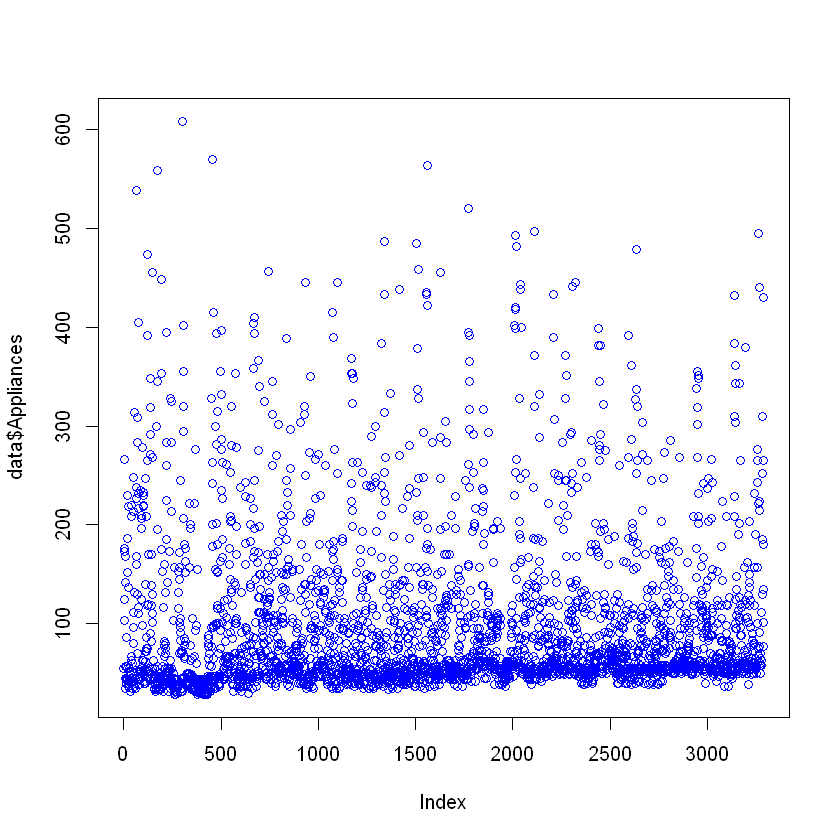

In [13]:
plot(data$Appliances, col='blue')

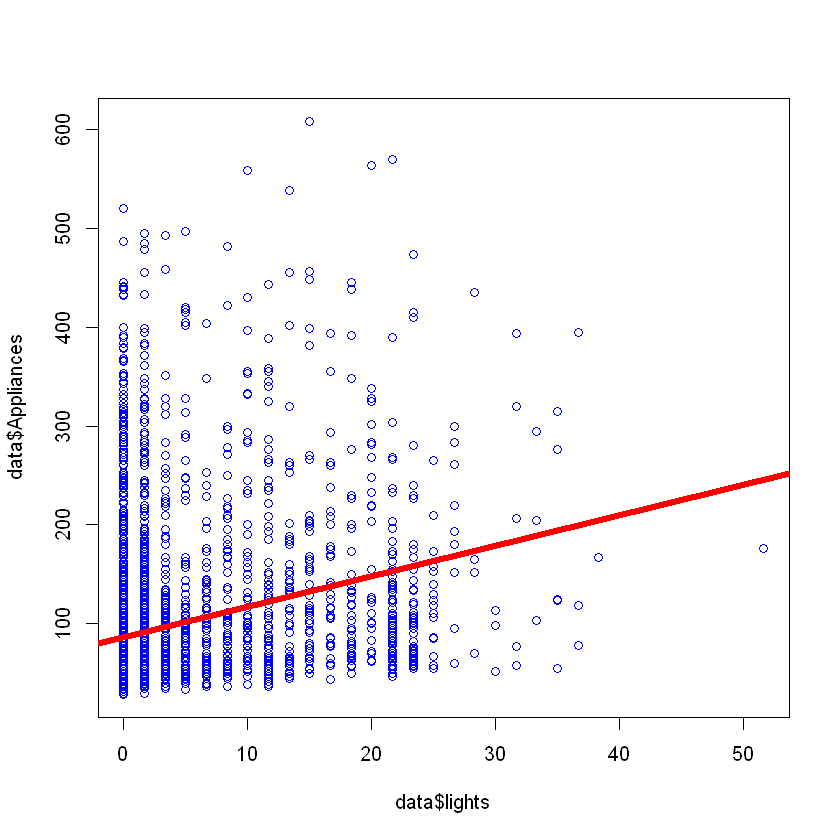

In [14]:
plot(data$lights,data$Appliances, col='blue')
abline(lm(data$Appliances ~ data$lights), col = "red", lwd = 5)
#now if we see the plot we can that lights have positive correlation

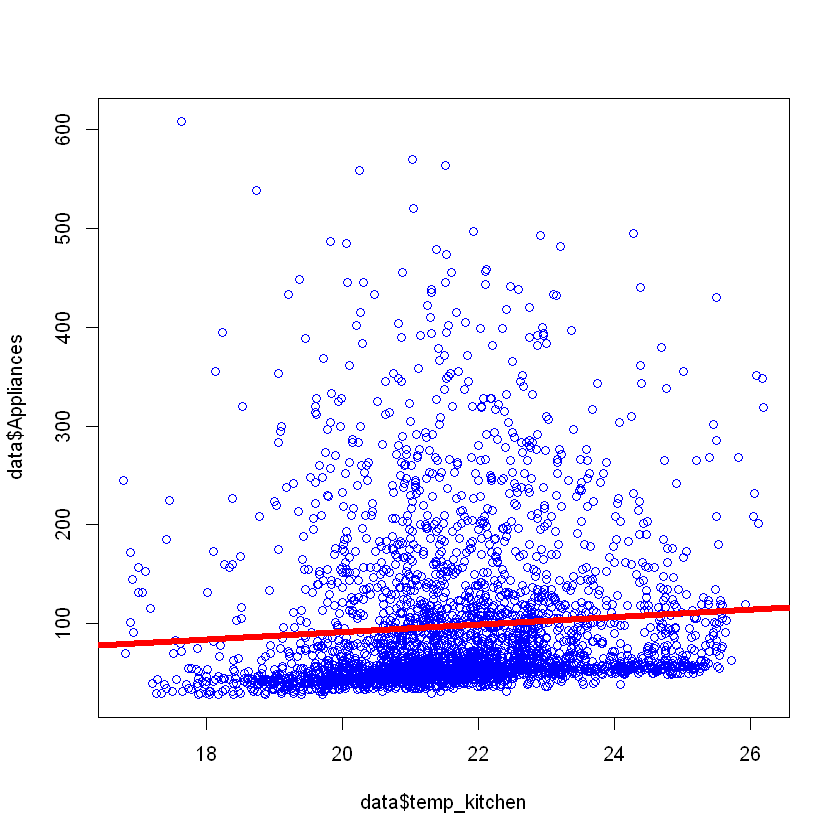

In [15]:
plot(data$temp_kitchen,data$Appliances, col='blue')
abline(lm(data$Appliances ~ data$temp_kitchen), col = "red", lwd = 5)
#slightly positive correlation

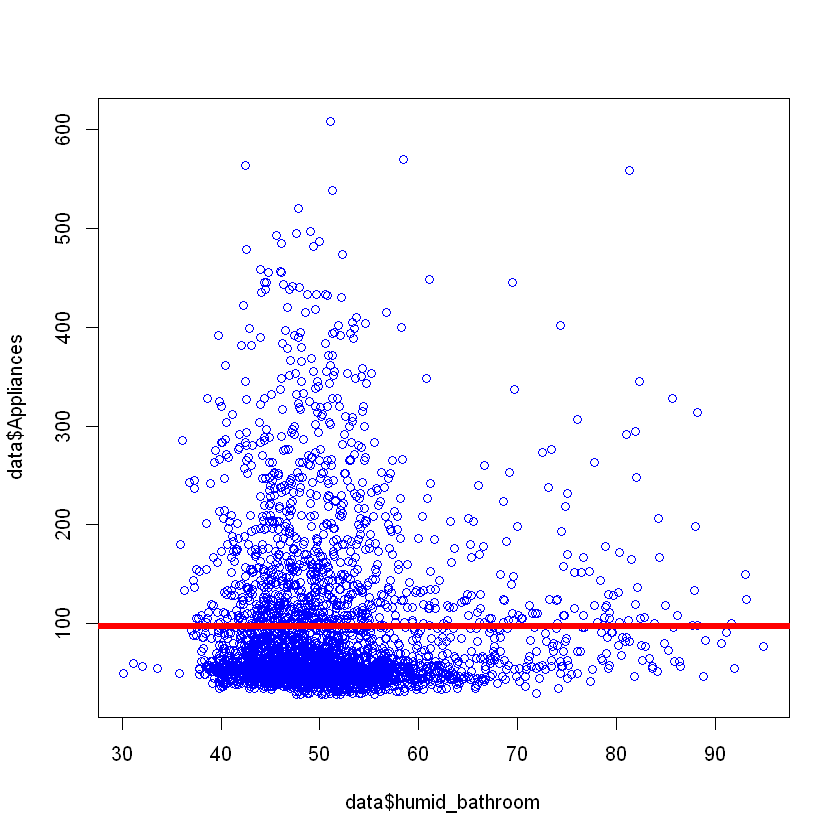

In [16]:
plot(data$humid_bathroom,data$Appliances, col='blue')
abline(lm(data$Appliances ~ data$humid_bathroom), col = "red", lwd = 5)
#no corelation

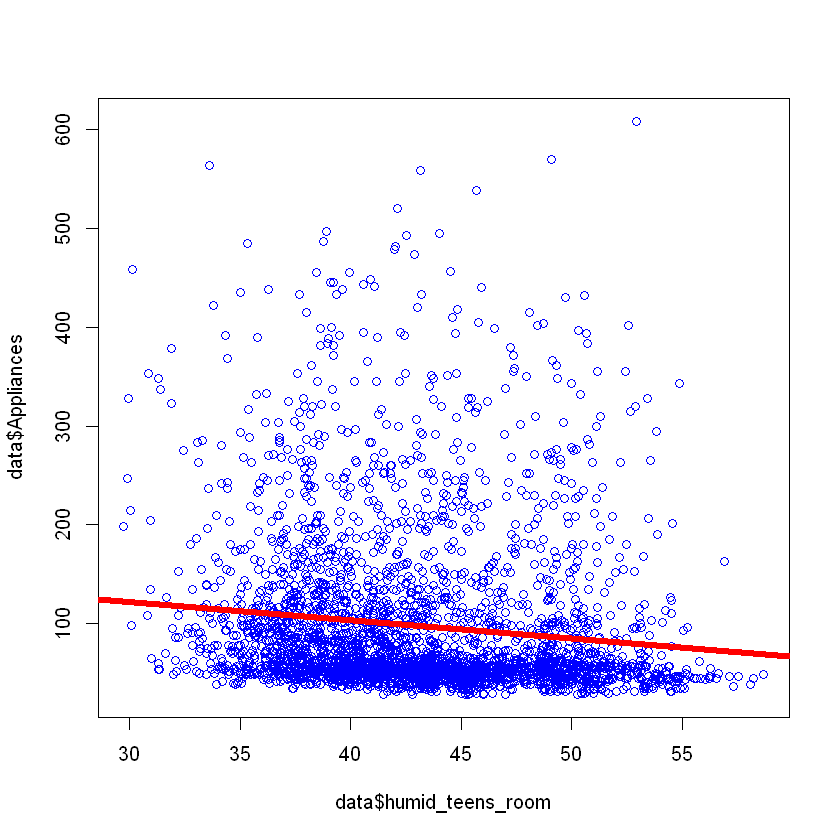

In [17]:
plot(data$humid_teens_room,data$Appliances, col='blue')
abline(lm(data$Appliances ~ data$humid_teens_room), col = "red", lwd = 5)
#negative corealation with appliances

Plotting Correlation plot

Warning message in ggcorr(data, hjust = 1, label = TRUE):
"data in column(s) 'date', 'Day_of_week', 'WeekStatus' are not numeric and were ignored"


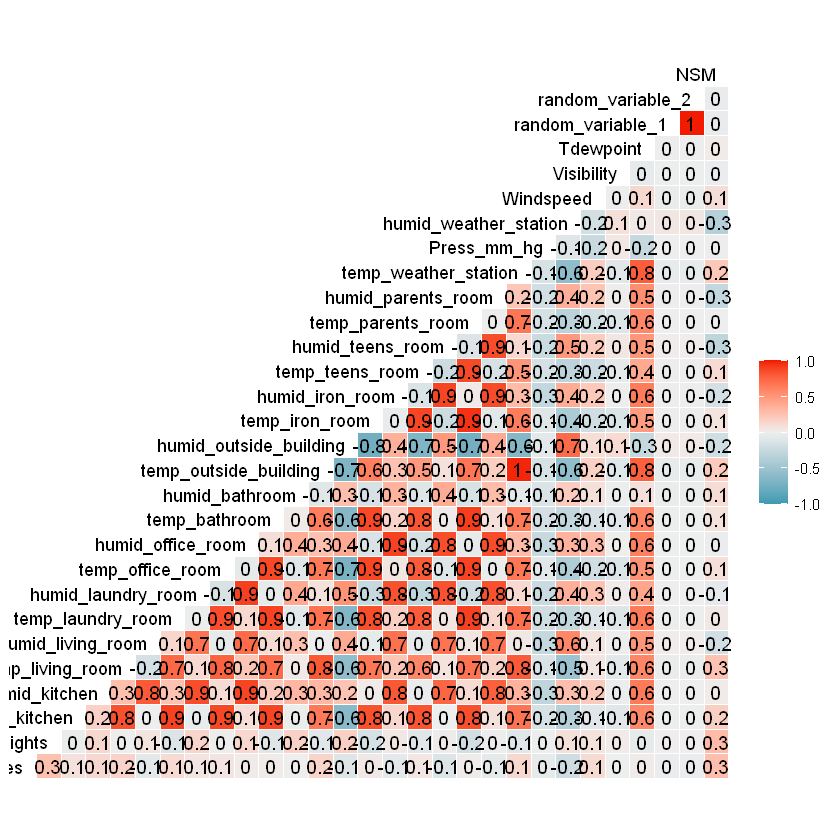

In [18]:
ggcorr(data, hjust =1, label = TRUE)

# Transformation

Removing the outliers

In [19]:
boxplot.stats(data$humid_laundry_room)$out
boxplot.stats(data$temp_office_room)$out
boxplot.stats(data$temp_kitchen)$out
boxplot.stats(data$humid_living_room)$out
out_hkit <- boxplot.stats(data$humid_kitchen)$out
out_tempout <- boxplot.stats(data$temp_outside_building)$out
out_humidstat <- boxplot.stats(data$humid_weather_station)$out
out_tempbath <- boxplot.stats(data$temp_bathroom)$out
out_tempiron <- boxplot.stats(data$temp_iron_room)$out
out_hiron <- boxplot.stats(data$humid_iron_room)$out
out_tempstat <- boxplot.stats(data$temp_weather_station)$out
out_tteen <- boxplot.stats(data$temp_teens_room)$out
out_hteen <- boxplot.stats(data$humid_teens_room)$out
boxplot.stats(data$humid_parents_room)$out
out_wind <- boxplot.stats(data$Windspeed)$out
out_dew <- boxplot.stats(data$Tdewpoint)$out
out_temppar <- boxplot.stats(data$temp_parents_room)$out
out_templiv <- boxplot.stats(data$temp_living_room)$out
out_press <- boxplot.stats(data$Press_mm_hg)$out

[1] 49.47222

[1] 15.69000 15.64500 15.58889 15.53333 15.50000 15.49389 15.39000 15.39000
 [9] 15.34000 15.30000 15.30000 15.29389 15.21444 15.19000 15.19000 15.19000
[17] 15.19000 15.19000 15.15500 15.12000 15.10000 15.14000 15.27833 15.50833
[25] 15.70833 15.69000 15.68000 15.61000 26.00833 25.94310 26.06964 26.10000
[33] 26.12048 26.14476 26.07333

[1] 17.86778 17.74500 17.61667 17.51667 17.40833 17.46111 17.85111 17.79000
 [9] 17.88167 17.86778 17.78000 17.71000 17.64444 17.56111 17.50000 17.42056
[17] 17.39000 17.33444 17.29000 17.27500 17.21000 17.18333 17.10000 17.06667
[25] 17.00000 17.00000 16.90833 16.89000 16.87889 16.81222 16.79000 16.93167
[33] 17.55111 17.86889 17.74000 17.63194 17.64278 17.89000 17.89000 25.65000
[41] 25.63333 25.50000 25.50000 25.56667 25.57778 25.50000 25.50000 25.59444
[49] 25.57361 25.47556 25.50000 25.52222 25.55556 25.60000 25.51111 25.60000
[57] 25.57083 25.51111 25.50000 25.83000 26.20333 26.12778 26.10000 26.06667
[65] 26.18778 26.05556 25.92833 25.71944 25.54389 25.54444 25.50000 25.48778
[73] 25.53333 25.50000

[1] 52.58444 28.71833 26.18556 28.59444 28.98083 25.00444 27.09472 28.71278
 [9] 29.79444 28.17222 29.54111 26.39722 25.25667 21.01000 21.76222 23.71667
[17] 25.50611 25.84167 27.56833 28.52889 29.55708 29.70556 29.35876 28.13348
[25] 26.78533 27.18243 28.01323 27.77222 29.00361 29.65971 51.41212 52.04221
[33] 52.67230 53.30239 53.91497 53.28667 52.57139 51.91944 51.33444 52.81444
[41] 51.74403

[1] 53.14000 29.51667 29.21889 29.48750

In [20]:
data_outlier <- data %>% filter(humid_laundry_room >= 49.34867 | temp_office_room >= 26.00583 | temp_office_room <= 15.69000 | temp_kitchen >= 25.45700 | temp_kitchen <= 17.89000 | humid_parents_room <= 29.22833 | humid_kitchen >= 51.91067 | humid_kitchen <= 28.26944 | temp_bathroom >= out_tempbath | humid_iron_room >= out_hiron | temp_teens_room <= out_tteen | humid_teens_room >= out_hteen | Windspeed >= out_wind | Tdewpoint >= out_dew | temp_outside_building >= out_tempout | humid_weather_station <= out_humidstat | temp_weather_station >= out_tempstat | temp_living_room >= out_templiv | temp_parents_room >= out_temppar | Press_mm_hg <= out_press)

data_outlier <- data %>% filter(humid_laundry_room >= 49.47222 | temp_office_room >= 25.94310 | temp_office_room <= 15.69000 | temp_kitchen >= 25.47556 | temp_kitchen <= 16.79000 | humid_parents_room >= 53.14000 | humid_parents_room <= 29.48750 | humid_living_room >= 51.33444 | humid_living_room <= 26.18556 | humid_kitchen >= out_hkit |temp_bathroom >= out_tempbath | humid_iron_room >= out_hiron | temp_teens_room <= out_tteen | humid_teens_room >= out_hteen | temp_parents_room >= out_temppar | temp_outside_building >= out_tempout | humid_weather_station <= out_humidstat | temp_weather_station >= out_tempstat | temp_living_room >= out_templiv | Windspeed >= out_wind | Tdewpoint >= out_dew)

data_outlier <- data %>% filter(humid_laundry_room >= 49.22667 | humid_laundry_room <= 29.00000 | temp_office_room >= 25.96333 | temp_office_room <= 15.66000 | temp_kitchen >= 25.39000 | temp_kitchen <= 17.79000  | humid_parents_room >= 53.16333 | humid_parents_room <= 29.16667 | humid_kitchen >= 52.12667 | humid_kitchen <= 27.36000 |temp_bathroom >= out_tempbath | humid_iron_room >= out_hiron | temp_teens_room <= out_tteen | humid_teens_room >= out_hteen | temp_outside_building >= out_tempout | humid_weather_station <= out_humidstat | temp_weather_station >= out_tempstat | temp_living_room >= out_templiv | Windspeed >= out_wind | Tdewpoint >= out_dew)


Warning message in temp_bathroom >= out_tempbath:
"longer object length is not a multiple of shorter object length"
Warning message in temp_teens_room <= out_tteen:
"longer object length is not a multiple of shorter object length"
Warning message in humid_teens_room >= out_hteen:
"longer object length is not a multiple of shorter object length"
Warning message in Windspeed >= out_wind:
"longer object length is not a multiple of shorter object length"
Warning message in temp_outside_building >= out_tempout:
"longer object length is not a multiple of shorter object length"
Warning message in humid_weather_station <= out_humidstat:
"longer object length is not a multiple of shorter object length"
Warning message in temp_weather_station >= out_tempstat:
"longer object length is not a multiple of shorter object length"
Warning message in temp_living_room >= out_templiv:
"longer object length is not a multiple of shorter object length"
Warning message in Press_mm_hg <= out_press:
"longer obj

In [21]:
data <- data %>% filter(!date %in% data_outlier$date)

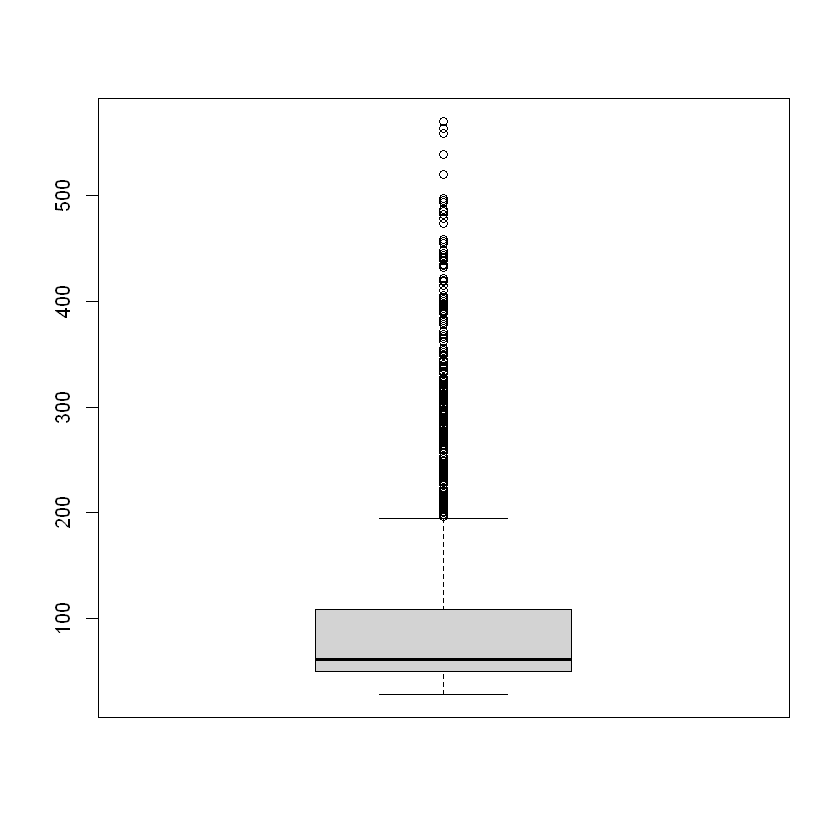

In [22]:
boxplot(data$Appliances)
#contain outlier

In [23]:
data <- data %>% 
  mutate( zscore = (Appliances - mean(Appliances)) / sd(Appliances)) %>%
  filter(zscore <=3) %>%
  select(-zscore)
#removing outlier using z score

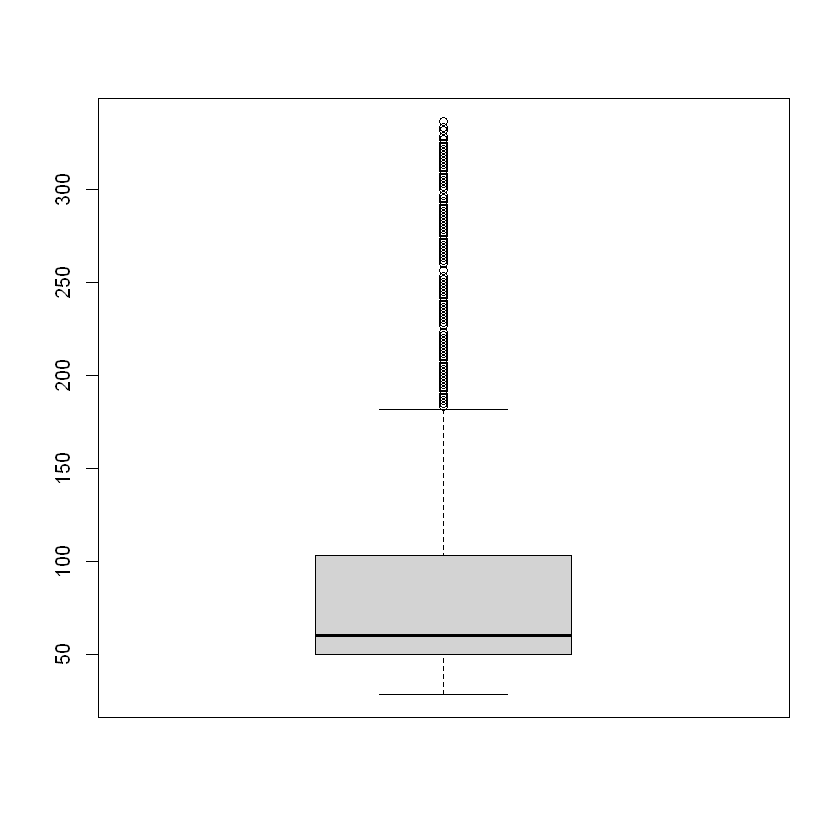

In [24]:
boxplot(data$Appliances)

Taking log of the appliances feature to make it uniform

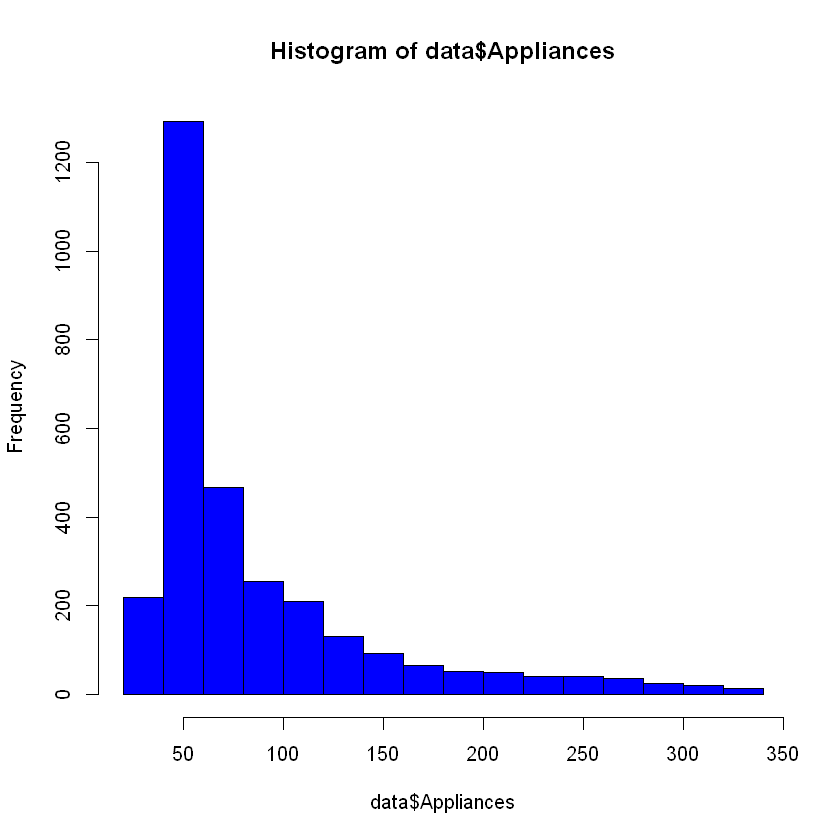

In [25]:
hist(data$Appliances, col='blue')

In [26]:
data$Appliances = log(data$Appliances)

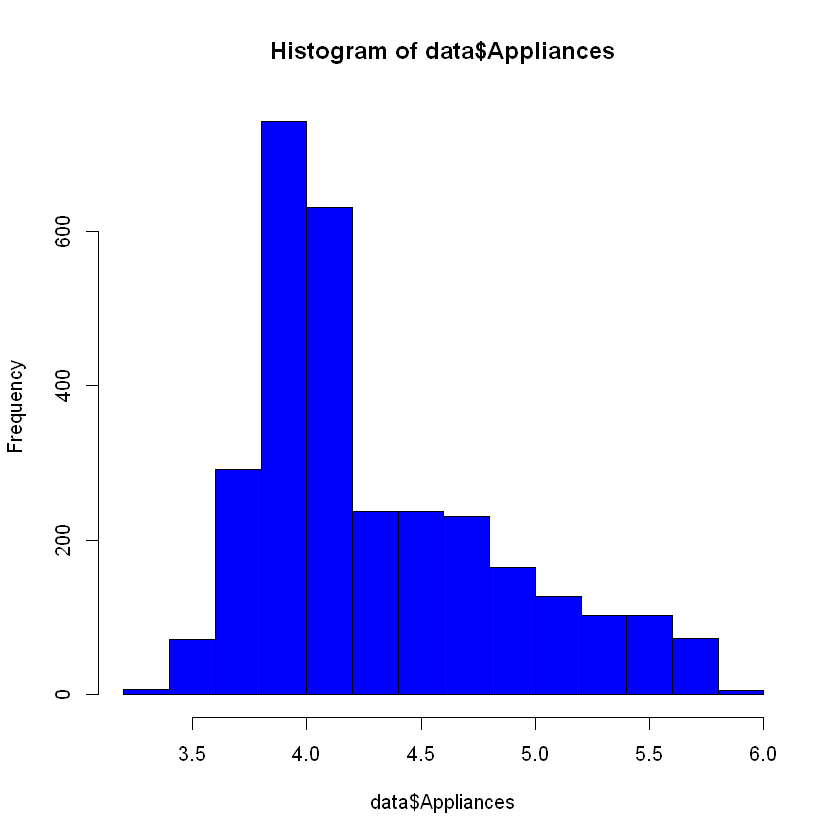

In [27]:
hist(data$Appliances, col='blue')

# Model Building and Evaluation

In [28]:
data$random_variable_1 <- NULL
data$random_variable_2 <- NULL
data$date <- NULL

Splitting the data into training and test data

In [29]:
set.seed(100)
split <- sample(nrow(data), nrow(data)*0.8)

data_train <- data[split,]
data_test <- data[-split,]

In [30]:
dim(data_train)
dim(data_test)

[1] 2416   29

[1] 605  29

# Multiple Linear Regression

In [31]:
model <- lm(Appliances ~ ., data=data_train)

In [32]:
summary(model)


Call:
lm(formula = Appliances ~ ., data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09795 -0.28378 -0.07715  0.16870  1.70374 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.335e+00  1.323e+00   3.276 0.001069 ** 
lights                  1.872e-02  1.561e-03  11.993  < 2e-16 ***
temp_kitchen            5.210e-02  2.701e-02   1.929 0.053833 .  
humid_kitchen           1.422e-01  1.124e-02  12.652  < 2e-16 ***
temp_living_room       -1.550e-01  2.419e-02  -6.407 1.78e-10 ***
humid_living_room      -1.102e-01  1.146e-02  -9.616  < 2e-16 ***
temp_laundry_room       1.331e-01  1.497e-02   8.890  < 2e-16 ***
humid_laundry_room      1.810e-04  1.001e-02   0.018 0.985579    
temp_office_room       -3.057e-03  1.483e-02  -0.206 0.836672    
humid_office_room      -1.314e-02  9.064e-03  -1.450 0.147325    
temp_bathroom           3.149e-02  1.618e-02   1.946 0.0517

In [33]:
control <- trainControl(method = "cv", number = 10)

cv_model <- train(Appliances ~ ., data = data_train, method = "lm", trControl = control)

cv_model

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

Linear Regression 

2416 samples
  28 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2174, 2175, 2175, 2175, 2174, 2175, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4405025  0.3638415  0.3300455

Tuning parameter 'intercept' was held constant at a value of TRUE

In [34]:
control <- trainControl(method = "cv", number = 10)

cv_model <- train(Appliances ~ ., data = data_test, method = "lm", trControl = control)

cv_model

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

Linear Regression 

605 samples
 28 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 545, 546, 544, 544, 544, 545, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.433125  0.3092921  0.3283818

Tuning parameter 'intercept' was held constant at a value of TRUE

# Random Forest

In [35]:
set.seed(123)
rf_model <- randomForest(x = data_train %>% select(-Appliances),
                         y = data_train$Appliances, 
                         ntree = 500)
rf_model


Call:
 randomForest(x = data_train %>% select(-Appliances), y = data_train$Appliances,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 9

          Mean of squared residuals: 0.1254334
                    % Var explained: 58.83

In [36]:
which.min(rf_model$mse)

[1] 277

In [37]:
sqrt(rf_model$mse[which.min(rf_model$mse)]) 

[1] 0.3533838

In [38]:
pred_rf_val <- predict(object =rf_model, newdata = data_test)

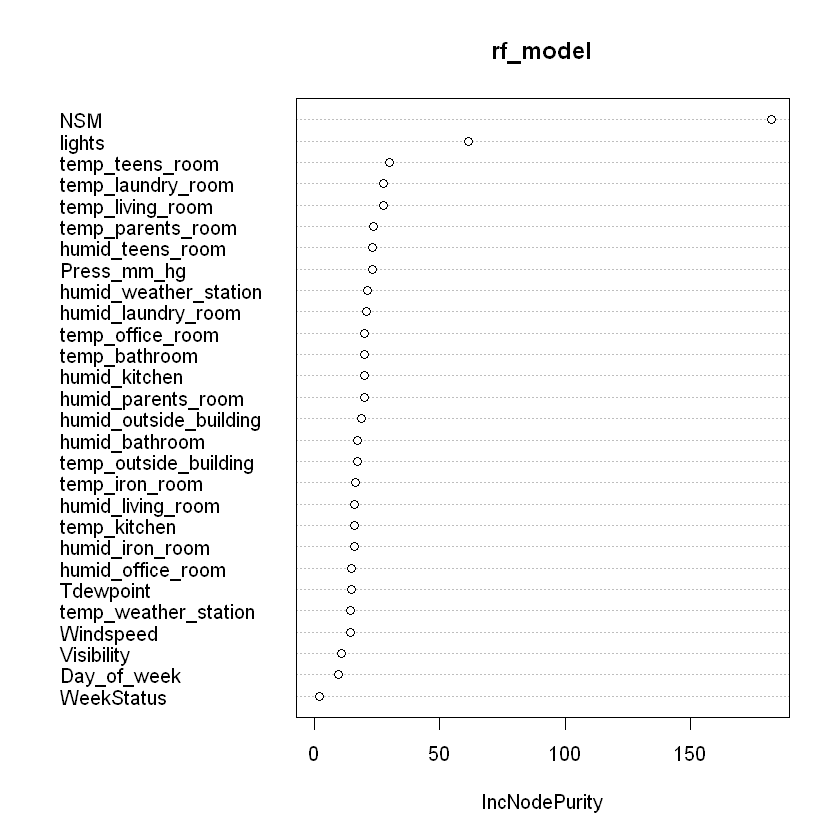

In [39]:
varImpPlot(rf_model) 

In [40]:
sqrt(mean((data_test$Appliances - pred_rf_val)^2))

[1] 0.3426184